# Questão 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

In [2]:
df = pd.read_csv('data/BostonHousing.csv', header=(0))
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [3]:
df = df.dropna()
df = df.drop(df.columns[[0]], axis=1)
df

,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [4]:
ylabel = df.columns[-1]

In [5]:
df = df.to_numpy()
nrow,ncol = df.shape
y = df[:,-1]
X = df[:,0:ncol-1]

In [6]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

## Regressão Linear Múltipla

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

In [8]:
model = linear_model.LinearRegression()

In [9]:
best_degree = 0
best_r2 = 0

for degree in range(1,6):

    poly_lin = PolynomialFeatures(degree=degree)

    x_train_poly_lin = poly_lin.fit_transform(x_train)
    model.fit(x_train_poly_lin, y_train)

    x_test_poly_lin = poly_lin.transform(x_test)
    y_test_pred = model.predict(x_test_poly_lin)

    r2 = r2_score(y_test, y_test_pred)
    print('Grau polinomial:', degree)
    print('R2 no conjunto de teste:', r2)

    if r2 > best_r2:
        best_degree = degree
        best_r2 = r2

r2_lm = best_r2

Grau polinomial: 1
R2 no conjunto de teste: 0.7150613796634331
Grau polinomial: 2
R2 no conjunto de teste: 0.5746131920657745
Grau polinomial: 3
R2 no conjunto de teste: -29914.798370277087
Grau polinomial: 4
R2 no conjunto de teste: -2605.137767242186
Grau polinomial: 5
R2 no conjunto de teste: -696.0668771809401


## LASSO

In [10]:
from sklearn.linear_model import Lasso

In [11]:
best_degree = 0
best_r2 = 0
for degree in range(1,6):
    poly_lasso = PolynomialFeatures(degree=degree) 
    x_train_poly_lasso = poly_lasso.fit_transform(x_train)

    model_lasso = Lasso(alpha=0, max_iter=10000) 
    model_lasso.fit(x_train_poly_lasso, y_train)

    x_test_poly_lasso = poly_lasso.transform(x_test)
    y_pred_lasso = model_lasso.predict(x_test_poly_lasso)

    r2_lasso = r2_score(y_test, y_pred_lasso)
    print('Grau polinomial:', degree)
    print('R2 no conjunto de teste:', r2_lasso)

    if r2_lasso > best_r2:
        best_degree = degree
        best_r2 = r2_lasso

r2_lasso = best_r2

Grau polinomial: 1
R2 no conjunto de teste: 0.7150613796634293
Grau polinomial: 2
R2 no conjunto de teste: 0.5482486195966325


c:\ProgramData\miniconda3\Lib\site-packages\sklearn\base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
c:\ProgramData\miniconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\ProgramData\miniconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.116e+03, tolerance: 3.112e+00
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descen

Grau polinomial: 3
R2 no conjunto de teste: -1.315556965491441


c:\ProgramData\miniconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.842e+02, tolerance: 3.112e+00
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
c:\ProgramData\miniconda3\Lib\site-packages\sklearn\base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
c:\ProgramData\miniconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descen

Grau polinomial: 4
R2 no conjunto de teste: -0.17698703510691538
Grau polinomial: 5
R2 no conjunto de teste: -0.5667426872046772


c:\ProgramData\miniconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.131e+02, tolerance: 3.112e+00
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


In [12]:
alphas = [i for i in range(0,100)]
r2s = []
for alpha in alphas:
    poly_lasso = PolynomialFeatures(degree=best_degree) 
    x_train_poly_lasso = poly_lasso.fit_transform(x_train)

    model_lasso = Lasso(alpha=alpha, max_iter=10000) 
    model_lasso.fit(x_train_poly_lasso, y_train)

    x_test_poly_lasso = poly_lasso.transform(x_test)
    y_pred_lasso = model_lasso.predict(x_test_poly_lasso)

    r2_lasso = r2_score(y_test, y_pred_lasso)
    r2s.append(r2_lasso)

c:\ProgramData\miniconda3\Lib\site-packages\sklearn\base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
c:\ProgramData\miniconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\ProgramData\miniconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.116e+03, tolerance: 3.112e+00
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descen

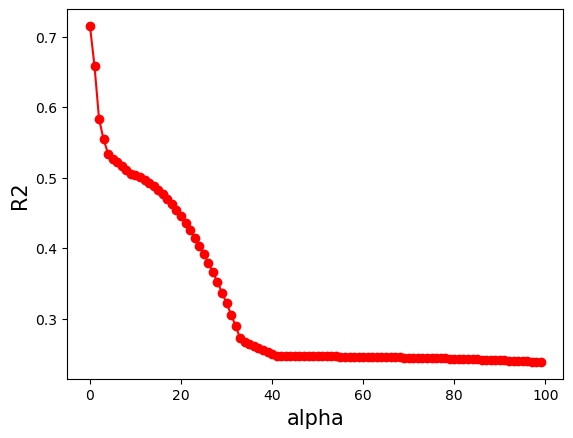

In [13]:
plt.plot(alphas, r2s, '-ro')
plt.xlabel("alpha", fontsize=15)
plt.ylabel("R2", fontsize=15)
plt.show(True)

##  Ridge Regression

In [14]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [16]:
best_degree = 0
best_r2 = 0
for degree in range(1, 6):
    
    poly_ridge = PolynomialFeatures(degree=degree)
    x_train_poly_ridge = poly_ridge.fit_transform(x_train_scaled)
    
    model_ridge = Ridge(alpha=0)
    model_ridge.fit(x_train_poly_ridge, y_train)
    
    x_test_poly_ridge = poly_ridge.transform(x_test_scaled)
    y_pred_ridge = model_ridge.predict(x_test_poly_ridge)
    
    r2_ridge = r2_score(y_test, y_pred_ridge)
    print('Grau polinomial:', degree)
    print('R2 no conjunto de teste:', r2_ridge)

    if r2_lasso > best_r2:
        best_degree = degree
        best_r2 = r2_ridge

r2_ridge = best_r2

Grau polinomial: 1
R2 no conjunto de teste: 0.7150613796634315
Grau polinomial: 2
R2 no conjunto de teste: 0.5708606991188223
Grau polinomial: 3
R2 no conjunto de teste: -1637957.117633506
Grau polinomial: 4
R2 no conjunto de teste: -101.90296068799289
Grau polinomial: 5
R2 no conjunto de teste: -78.95584860491105


C:\Users\pedro\AppData\Roaming\Python\Python313\site-packages\scipy\_lib\_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=1.39211e-18): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
C:\Users\pedro\AppData\Roaming\Python\Python313\site-packages\scipy\_lib\_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=2.13195e-18): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
c:\ProgramData\miniconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:252: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


In [17]:
alphas = [i for i in range(0,100)]
r2s = []
for alpha in alphas:
    poly_ridge = PolynomialFeatures(degree=best_degree)
    x_train_poly_ridge = poly_ridge.fit_transform(x_train_scaled)
    
    model_ridge = Ridge(alpha=alpha)
    model_ridge.fit(x_train_poly_ridge, y_train)
    
    x_test_poly_ridge = poly_ridge.transform(x_test_scaled)
    y_pred_ridge = model_ridge.predict(x_test_poly_ridge)
    
    r2_ridge = r2_score(y_test, y_pred_ridge)
    r2s.append(r2_ridge)

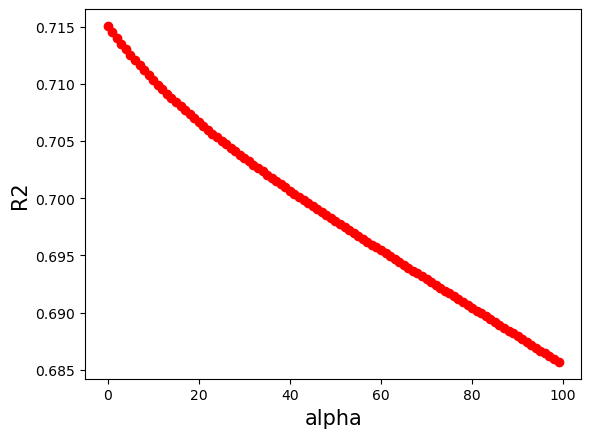

In [18]:
plt.plot(alphas, r2s, '-ro')
plt.xlabel("alpha", fontsize=15)
plt.ylabel("R2", fontsize=15)
plt.show(True)

In [19]:
if r2_lm > r2_lasso and r2_lm > r2_ridge:
    print('O modelo com o melhor R2 foi: Linear Regression')
elif r2_lasso > r2_lm and r2_lasso > r2_ridge:
    print('O modelo com o melhor R2 foi: Lasso')
else:
    print('O modelo com o melhor R2 foi: Ridge')

O modelo com o melhor R2 foi: Linear Regression


# Questão 2

In [20]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [21]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [22]:
poly = PolynomialFeatures(degree=1, include_bias=False)
x_train_poly = poly.fit_transform(x_train_scaled)

In [23]:
best_alpha_lasso = 0
model_lasso_best = Lasso(alpha=best_alpha_lasso, max_iter=20000)
model_lasso_best.fit(x_train_poly, y_train)

c:\ProgramData\miniconda3\Lib\site-packages\sklearn\base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
c:\ProgramData\miniconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\ProgramData\miniconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.116e+03, tolerance: 3.112e+00
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descen

,alpha,0
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,20000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [24]:
df_cols = pd.read_csv('data/BostonHousing.csv', header=(0))
df_cols = df_cols.drop(df_cols.columns[[0, -1]], axis=1)
original_feature_names = df_cols.columns

In [25]:
poly_feature_names = poly.get_feature_names_out(original_feature_names)

coefs = pd.DataFrame(
    data=model_lasso_best.coef_,
    index=poly_feature_names,
    columns=['Coefficient']
)

influential_features = coefs[coefs['Coefficient'] != 0]

influential_features['Abs_Coefficient'] = influential_features['Coefficient'].abs()
sorted_features = influential_features.sort_values(by='Abs_Coefficient', ascending=False)

In [26]:
print("Variáveis mais influentes (valor absoluto) segundo o modelo LASSO:")
print(abs(sorted_features[['Coefficient']]))

Variáveis mais influentes (valor absoluto) segundo o modelo LASSO:
         Coefficient
lstat       4.024610
rm          2.950975
dis         2.743994
ptratio     2.016154
nox         1.645390
rad         1.439468
tax         1.422677
b           1.065384
chas        0.878727
zn          0.694898
age         0.357849
indus       0.351754


# Questão 3

In [27]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [28]:
import numpy as np
from matplotlib import pyplot as plt
np.random.seed(10)

In [29]:
#função para gerar os dados
def function(x):
    y = x**4 + x**9
    return y

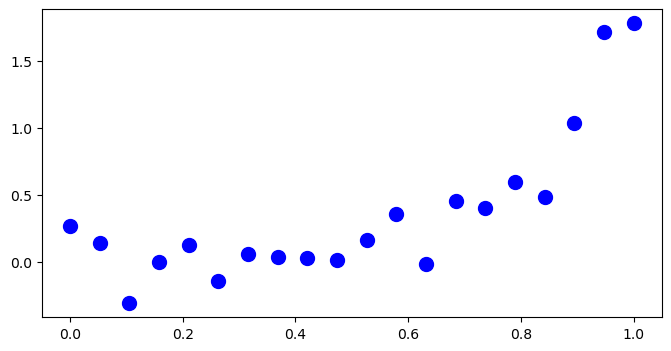

In [30]:
# training set
N_train = 20
sigma = 0.2
x_train= np.linspace(0, 1,N_train)
y_train = function(x_train) + np.random.normal(0,sigma, N_train)
x_train = x_train.reshape(len(x_train), 1)
fig = plt.figure(figsize=(8, 4))
plt.scatter(x_train, y_train, facecolor="blue", edgecolor="b", s=100, label="training data")

In [31]:
# test set
N_test = 20
x_test = np.linspace(0, 1,N_test)
y_test = function(x_test) + np.random.normal(0,sigma, N_test)
x_test = x_test.reshape(len(x_test), 1)

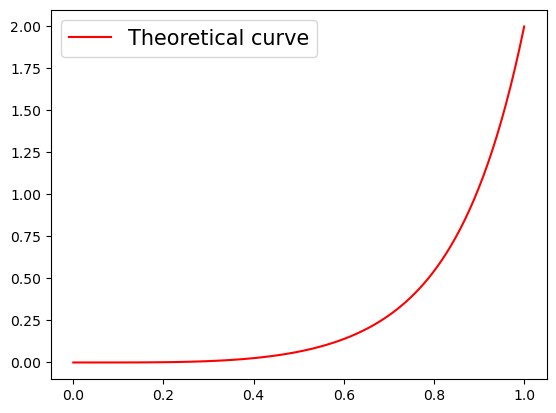

In [32]:
# Curva teorica
xt = np.linspace(0,1,100)
yt = function(xt)
plt.plot(xt,yt, '-r', label="Theoretical curve")
plt.legend(fontsize=15)
plt.show(True)


In [33]:
degrees = range(1, 16)
train_scores = []
test_scores = []

alpha_ridge = 0.5

for degree in degrees:
    model = make_pipeline(
        StandardScaler(),
        PolynomialFeatures(degree=degree),
        Ridge(alpha=alpha_ridge)
    )
    
    model.fit(x_train, y_train)
    
    y_train_pred = model.predict(x_train)
    train_scores.append(r2_score(y_train, y_train_pred))
    
    y_test_pred = model.predict(x_test)
    test_scores.append(r2_score(y_test, y_test_pred))

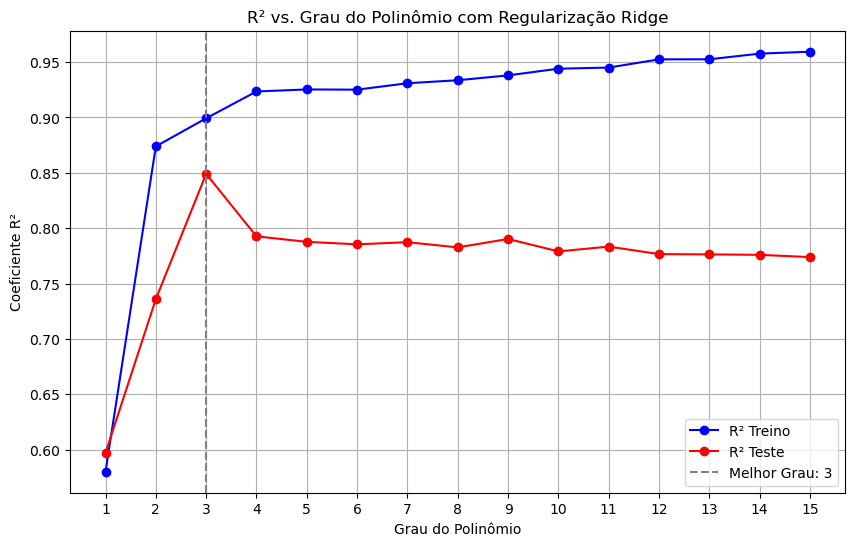

O grau do polinômio mais adequado é: 3
Com um R² no conjunto de teste de: 0.8490


In [34]:
best_degree = degrees[np.argmax(test_scores)]
best_test_r2 = max(test_scores)

plt.figure(figsize=(10, 6))
plt.plot(degrees, train_scores, 'o-', label='R² Treino', color='blue')
plt.plot(degrees, test_scores, 'o-', label='R² Teste', color='red')
plt.axvline(best_degree, linestyle='--', color='gray', label=f'Melhor Grau: {best_degree}')
plt.title('R² vs. Grau do Polinômio com Regularização Ridge')
plt.xlabel('Grau do Polinômio')
plt.ylabel('Coeficiente R²')
plt.xticks(degrees)
plt.legend()
plt.grid(True)
plt.show()

print(f"O grau do polinômio mais adequado é: {best_degree}")
print(f"Com um R² no conjunto de teste de: {best_test_r2:.4f}")

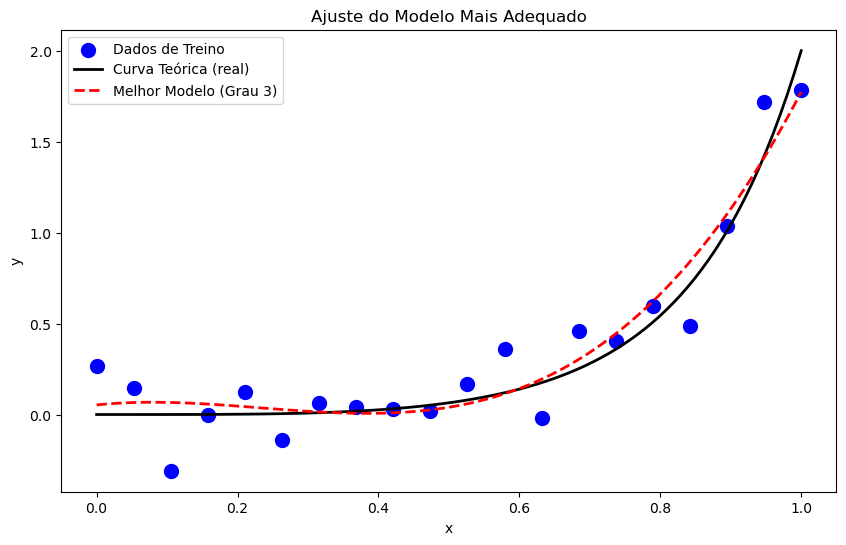

In [35]:
best_model = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(degree=best_degree),
    Ridge(alpha=alpha_ridge)
)
best_model.fit(x_train, y_train)

xt = np.linspace(0, 1, 100).reshape(-1, 1)
yt = function(xt)

yt_pred_best = best_model.predict(xt)

plt.figure(figsize=(10, 6))
plt.scatter(x_train, y_train, facecolor="blue", edgecolor="b", s=100, label="Dados de Treino")
plt.plot(xt, yt, '-k', label="Curva Teórica (real)", linewidth=2)
plt.plot(xt, yt_pred_best, '--r', label=f"Melhor Modelo (Grau {best_degree})", linewidth=2)
plt.title('Ajuste do Modelo Mais Adequado')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# Questão 4

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [37]:
df = pd.read_csv('data/Vehicle.csv', header=(0))
df

,Comp,Circ,D.Circ,Rad.Ra,Pr.Axis.Ra,Max.L.Ra,Scat.Ra,Elong,Pr.Axis.Rect,Max.L.Rect,Sc.Var.Maxis,Sc.Var.maxis,Ra.Gyr,Skew.Maxis,Skew.maxis,Kurt.maxis,Kurt.Maxis,Holl.Ra,Class
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,93,39,87,183,64,8,169,40,20,134,200,422,149,72,7,25,188,195,saab
842,89,46,84,163,66,11,159,43,20,159,173,368,176,72,1,20,186,197,van
843,106,54,101,222,67,12,222,30,25,173,228,721,200,70,3,4,187,201,saab
844,86,36,78,146,58,7,135,50,18,124,155,270,148,66,0,25,190,195,saab


In [38]:
x = df.drop('Class', axis=1)
y = df['Class']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)


In [40]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Regressão Logística

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
log_reg = LogisticRegression(max_iter=1000, solver='liblinear')
param_grid_log_reg = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

In [43]:
grid_log_reg = GridSearchCV(log_reg, param_grid_log_reg, cv=5, scoring='accuracy')
grid_log_reg.fit(X_train_scaled, y_train)

c:\ProgramData\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
c:\ProgramData\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
c:\ProgramData\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the mu

,estimator,LogisticRegre...r='liblinear')
,param_grid,"{'C': [0.01, 0.1, ...], 'penalty': ['l1', 'l2']}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l1'


In [44]:
print("--- Regressão Logística ---")
print("Melhores Hiperparâmetros:", grid_log_reg.best_params_)
print(f"Melhor Acurácia (Validação Cruzada): {grid_log_reg.best_score_:.4f}")

best_log_reg = grid_log_reg.best_estimator_
test_accuracy = best_log_reg.score(X_test_scaled, y_test)
print(f"Acurácia no Conjunto de Teste: {test_accuracy:.4f}")

--- Regressão Logística ---
Melhores Hiperparâmetros: {'C': 10, 'penalty': 'l1'}
Melhor Acurácia (Validação Cruzada): 0.7771
Acurácia no Conjunto de Teste: 0.8228


## KNN

In [45]:
from sklearn.neighbors import KNeighborsClassifier

In [46]:
knn = KNeighborsClassifier()

param_grid_knn = {
    'n_neighbors': list(range(1, 16)), # Testar de 1 a 15 vizinhos
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

In [47]:
grid_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='accuracy')

grid_knn.fit(X_train_scaled, y_train)

c:\ProgramData\miniconda3\Lib\site-packages\sklearn\model_selection\_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\ProgramData\miniconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\ProgramData\miniconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\ProgramData\miniconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 400, in _score
    y_pred = method_caller(
        estimator,
    ...<2 lines>...
        pos_label=pos_label,
    )
  File "c:\ProgramData\miniconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 90, in _cached_call


,estimator,KNeighborsClassifier()
,param_grid,"{'metric': ['euclidean', 'manhattan'], 'n_neighbors': [1, 2, ...], 'weights': ['uniform', 'distance']}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,5


In [48]:
print("\\n--- K-Nearest Neighbors (KNN) ---")
print("Melhores Hiperparâmetros:", grid_knn.best_params_)
print(f"Melhor Acurácia (Grid Search): {grid_knn.best_score_:.4f}")

best_knn = grid_knn.best_estimator_
test_accuracy_knn = best_knn.score(X_test_scaled, y_test)
print(f"Acurácia no Conjunto de Teste: {test_accuracy_knn:.4f}")

\n--- K-Nearest Neighbors (KNN) ---
Melhores Hiperparâmetros: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
Melhor Acurácia (Grid Search): 0.7026
Acurácia no Conjunto de Teste: 0.7362


# Questão 5

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

In [56]:
df = pd.read_csv('data/winequality-red.csv', header=(0))
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [57]:
x = df.drop('quality', axis=1)
y = df['quality']

In [58]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)

In [59]:
pipeline = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=2000) # Aumentar max_iter para garantir a convergência
)

n_folds = list(range(3, 16))

In [60]:
mean_accuracies = []
std_accuracies = []

for k in n_folds:
    scores = cross_val_score(pipeline, x, y, cv=k, scoring='accuracy')
    mean_accuracies.append(np.mean(scores))
    std_accuracies.append(np.std(scores))
    print(f"  k = {k:2}: Acurácia Média = {np.mean(scores):.4f} (+/- {np.std(scores):.4f})")

  k =  3: Acurácia Média = 0.5754 (+/- 0.0380)
  k =  4: Acurácia Média = 0.5741 (+/- 0.0375)
  k =  5: Acurácia Média = 0.5823 (+/- 0.0466)
  k =  6: Acurácia Média = 0.5798 (+/- 0.0500)
  k =  7: Acurácia Média = 0.5855 (+/- 0.0553)
  k =  8: Acurácia Média = 0.5816 (+/- 0.0579)
  k =  9: Acurácia Média = 0.5854 (+/- 0.0696)
  k = 10: Acurácia Média = 0.5897 (+/- 0.0625)


c:\ProgramData\miniconda3\Lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 10 members, which is less than n_splits=11.
  warnings.warn(


  k = 11: Acurácia Média = 0.5899 (+/- 0.0682)


c:\ProgramData\miniconda3\Lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 10 members, which is less than n_splits=12.
  warnings.warn(


  k = 12: Acurácia Média = 0.5867 (+/- 0.0670)


c:\ProgramData\miniconda3\Lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 10 members, which is less than n_splits=13.
  warnings.warn(


  k = 13: Acurácia Média = 0.5960 (+/- 0.0684)


c:\ProgramData\miniconda3\Lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 10 members, which is less than n_splits=14.
  warnings.warn(


  k = 14: Acurácia Média = 0.5911 (+/- 0.0662)


c:\ProgramData\miniconda3\Lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 10 members, which is less than n_splits=15.
  warnings.warn(


  k = 15: Acurácia Média = 0.5929 (+/- 0.0753)


In [61]:
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(10, 6))
mean_accuracies = np.array(mean_accuracies)
std_accuracies = np.array(std_accuracies)

<Figure size 1000x600 with 0 Axes>

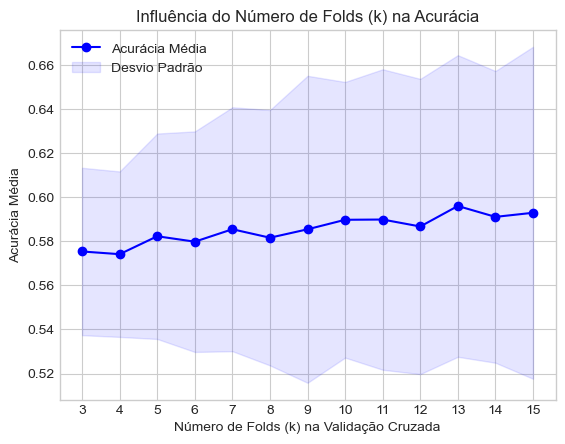

In [63]:
plt.plot(n_folds, mean_accuracies, 'o-', color='b', label='Acurácia Média')
plt.fill_between(n_folds, mean_accuracies - std_accuracies, mean_accuracies + std_accuracies,
                 alpha=0.1, color='b', label='Desvio Padrão')

plt.title('Influência do Número de Folds (k) na Acurácia')
plt.xlabel('Número de Folds (k) na Validação Cruzada')
plt.ylabel('Acurácia Média')
plt.xticks(n_folds)
plt.legend()
plt.grid(True)
plt.show()